In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras
!pip install tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1)

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Hodlo4j3jBVhj6tl21ig6T2_v7KZZSoXz5ysLbksQx4a',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizerrecommendationsystem-donotdelete-pr-qmx4g9oclsopa8'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [7]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [8]:
pwd

'/home/wsuser/work'

In [9]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DV0wGHUNJLct1c7Pd_uKXeurrkLz7zL7aV71YV7qUx_Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-ungserbrvuqmkc'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DV0wGHUNJLct1c7Pd_uKXeurrkLz7zL7aV71YV7qUx_Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-ungserbrvuqmkc'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [27]:
import os
filenames = os.listdir('/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set')

In [28]:
x_train =train_datagen.flow_from_directory("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size = (128,128),batch_size = 32,class_mode = 'categorical')
x_test =test_datagen.flow_from_directory("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size = (128,128),batch_size = 32,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [29]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [30]:
model=Sequential()

In [31]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [32]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Flatten())

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(Dense(6,activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
len(x_train)

356

In [51]:
model.save('vegetable.h5')

In [53]:
!tar -zcvf fruit-classification.tgz vegetable.h5

vegetable.h5


In [54]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 22.4 MB/s eta 0:00:01


In [56]:
from ibm_watson_machine_learning import APIClient

wml_credentials ={ 
    "url":"https://jp-tok.ml.cloud.ibm.com", 
    "apikey":"jofw6uEvdPqcQshABjVcEjRyRgbEvv-sl3j7l7-MVPlZ"
    }

client = APIClient(wml_credentials)
client

In [57]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:jp-tok:a/7bf14437568e4070b47f2f12fca94e6f:9081985e-d0e1-45d7-8f4b-a4b98b93f0d6::',
      'guid': '9081985e-d0e1-45d7-8f4b-a4b98b93f0d6',
      'name': 'WatsonMachineLearning',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'CNN Deployment fruit training',
    'scope': {'bss_account_id': '7bf14437568e4070b47f2f12fca94e6f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'da505c20-5a35-4e92-94f2-396552e3ee8b',
      'bucket_region': 'jp-tok-standard',
      'credentials': {'admin': {'access_key_id': '70b14dc100854c55aded9b03820b2d9d',
        'api_key': 'GLlHxpE26WWUM_dzYUE5XCejYLQZfb6zDnLlgRTZhf1i',
        'secret_access_key': '108a459f81984a4cb0d5315ca52d40d27a804450bfed23fe',
        'service_id': 'ServiceId-da68cbb1-302f-41bf-a4f0-a09bd6795b85'},
       'editor': {'access_key_id': 'dab1648f691c4938a4f5c1768e9432de',

In [58]:
def guid_from_space_name(client, space_name):
  space = client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [66]:
space_uid = guid_from_space_name(client, 'CNN Deployment Vegtable training')
print("Space UID = " +space_uid)

StopIteration: 

In [67]:
space_uid = guid_from_space_name(client, 'CNN Deployment fruit training')
print("Space UID = " +space_uid)

Space UID = e9eb5897-f25a-4e1d-868f-d02855f022f8


In [68]:
client.set.default_space(space_uid)

'SUCCESS'

In [69]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [70]:
software_spec_uid = client.software_specifications.get_id_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [71]:
model_details = client.repository.store_model(model='Vegetable-classification.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Vegetable Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T08:47:10.651Z',
  'id': '4bcf7280-b45b-4c66-a1c0-01e79bfd42d1',
  'modified_at': '2022-11-18T08:47:16.210Z',
  'name': 'CNN Fruit Model',
  'owner': 'IBMid-662004055J',
  'resource_key': 'caea173a-8785-43cc-8313-5683906cbf87',
  'space_id': 'e9eb5897-f25a-4e1d-868f-d02855f022f8'},
 'system': {'warnings': []}}

In [73]:
model_id = client.repository.get_model_id(model_details)
model_id

'4bcf7280-b45b-4c66-a1c0-01e79bfd42d1'

In [74]:
client.repository.download(model_id,'IBM_Vegetable_model.tar.gb')

Successfully saved model content to file: 'IBM_Vegetable_model.tar.gb'


'/home/wsuser/work/IBM_Vegetable_model.tar.gb'

In [75]:
ls

'Dataset Plant Disease'/    IBM_Vegetable_model.tar.gb
 fruit-classification.tgz   vegetable.h5


In [76]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf

In [78]:
model = load_model("vegetable.h5")

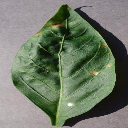

In [81]:
image=image.load_img("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG",target_size=(128,128))
image

In [112]:

from tensorflow.keras.preprocessing import image

In [114]:
x=image.img_to_array(img)

In [115]:
x=np.expand_dims(x,axis=0)

In [117]:
y=image.img_to_array(img)

In [118]:
y=np.argmax(model.predict(x),axis=1)

In [92]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [121]:
img=image.load_img("/home/wsuser/work/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/b8803558-9e0f-404e-80b3-c78d0bc7f6d0___RS_Early.B 7548.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Pepper,_bell___healthy'